In [1]:
import pandas as pd

imdb_rv = pd.read_csv('imdb-reviews_2.csv') # reading the file
imdb_rv = imdb_rv.copy()
imdb_rv.head()

,review,label
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [2]:
p_n_r = imdb_rv['label'].value_counts() # counting the number of positive and negative sentiments
p_n_r

,count
label,
1,2528
0,2472


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [4]:
imdb_rv['review_processed'] = imdb_rv['review'] # creating the new review_processed column
imdb_rv.head()

,review,label,review_processed
0,"first think another Disney movie, might good, ...",1,"first think another Disney movie, might good, ..."
1,"Put aside Dr. House repeat missed, Desperate H...",0,"Put aside Dr. House repeat missed, Desperate H..."
2,"big fan Stephen King's work, film made even gr...",1,"big fan Stephen King's work, film made even gr..."
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing TV. Needless say one movi...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed film. acting terrific plot. Jeff...


In [5]:
imdb_rv['review_processed'] = imdb_rv['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2])) # cleaning the review as per instructions on blackboard
imdb_rv['review_processed'].head()

,review_processed
0,"first think another Disney movie, might good, ..."
1,"Put aside Dr. House repeat missed, Desperate H..."
2,"big fan Stephen King's work, film made even gr..."
3,watched horrid thing TV. Needless say one movi...
4,truly enjoyed film. acting terrific plot. Jeff...


In [6]:
imdb_rv['review_processed'] = imdb_rv['review_processed'].str.lower() # making the text lower case
imdb_rv['review_processed'].head()

,review_processed
0,"first think another disney movie, might good, ..."
1,"put aside dr. house repeat missed, desperate h..."
2,"big fan stephen king's work, film made even gr..."
3,watched horrid thing tv. needless say one movi...
4,truly enjoyed film. acting terrific plot. jeff...


In [7]:
import re

stop_words = set(stopwords.words('english')) # defining the stopwords
add_stopwords = set(['movie', 'film', 'one', 'make', 'even'])  # defining the additional stop words
stop_words.update(add_stopwords)

temp_lst = []

for i in imdb_rv['review_processed']:
    c_r = re.sub(r'<[^>]+>', ' ', i) # I have observed some unnecessary text, removing them
    c_r = re.sub(r'\s+', ' ', c_r).strip()
    wrds = c_r.split()  # getting words
    filt_wrds = []
    for x in wrds: # removing stop words
        if x not in stop_words:
            filt_wrds.append(x)
    fnl_rv = ' '.join(filt_wrds)
    temp_lst.append(fnl_rv)


imdb_rv['review_processed'] = temp_lst # adding to teh review

imdb_rv['review_processed'].head() # checking data

,review_processed
0,"first think another disney movie, might good, ..."
1,"put aside dr. house repeat missed, desperate h..."
2,"big fan stephen king's work, made greater fan ..."
3,watched horrid thing tv. needless say movies w...
4,truly enjoyed film. acting terrific plot. jeff...


In [8]:

def get_wrdnt_pos(tag): # a function to convert POS tag to wordnet format
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None


lemmatizer = WordNetLemmatizer() # creating the lemmatizer object

def lemm_sent(sentence): # a function for lemmatizing using POS
    pos_tagged = pos_tag(sentence.split())  # tagging the parts of speech
    wordnet_tagged = []


    for w, t in pos_tagged: # converting POS tags to WordNet format
        wordnet_tag = get_wrdnt_pos(t)
        wordnet_tagged.append((w, wordnet_tag))

    lemmed_sent = []
    for wd, tg in wordnet_tagged:
        if tg: # checking the pos tag and lemmatizing it
            lemmed_wrd = lemmatizer.lemmatize(wd, pos=tg)
        else:
            lemmed_wrd = wd
        lemmed_sent.append(lemmed_wrd)

    return ' '.join(lemmed_sent)

In [9]:
imdb_rv['review_processed'] = imdb_rv['review_processed'].apply(lemm_sent) # applying the lemmatizing function


In [10]:
imdb_rv['review_processed'].head() #checkking data

,review_processed
0,"first think another disney movie, might good, ..."
1,"put aside dr. house repeat missed, desperate h..."
2,"big fan stephen king's work, make great fan ki..."
3,watch horrid thing tv. needless say movie watc...
4,truly enjoyed film. act terrific plot. jeff co...


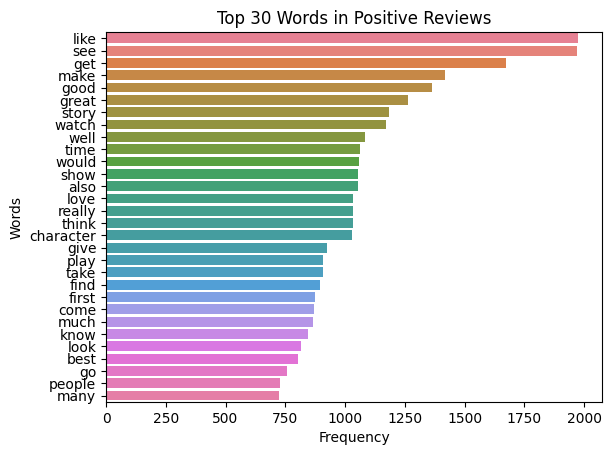

In [11]:

pst_reviews = imdb_rv[imdb_rv['label'] == 1] # getting positive reviews
pst_wrds = ' '.join(pst_reviews['review_processed']).split() # getting positive words
pst_wrd_freq = pd.Series(pst_wrds).value_counts()[:30] # top 30 freq words


sns.barplot(y=pst_wrd_freq.index, x=pst_wrd_freq.values, hue=pst_wrd_freq.index) # plotting with sns
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Words in Positive Reviews')
plt.show()

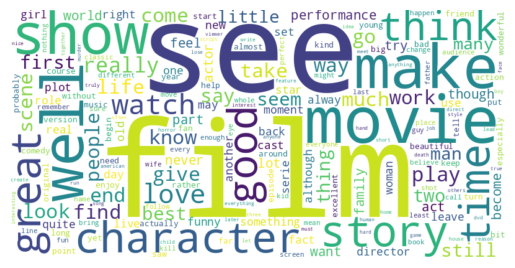

In [12]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(pst_wrds)) # creating the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
vectorizer = CountVectorizer(max_features=2500) # creating the sparse matrix

X = vectorizer.fit_transform(imdb_rv['review_processed']).toarray()
y = imdb_rv['label']  # target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # spliting the dataset


In [14]:

gnb = GaussianNB() # initializing the Gaussian model
gnb.fit(X_train, y_train) # training
y_pred_gnb = gnb.predict(X_test) # testing
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))


Accuracy: 0.713


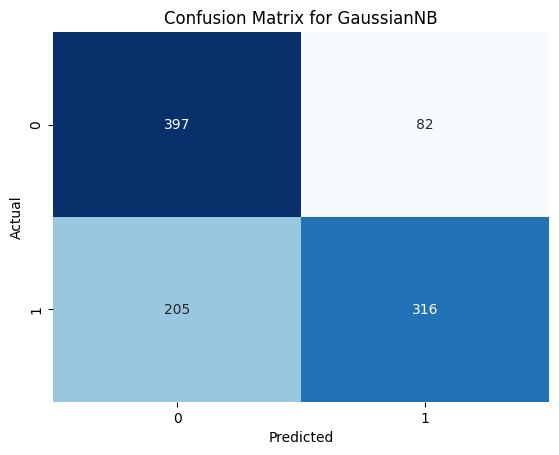

Classification Report :               precision    recall  f1-score   support

           0       0.66      0.83      0.73       479
           1       0.79      0.61      0.69       521

    accuracy                           0.71      1000
   macro avg       0.73      0.72      0.71      1000
weighted avg       0.73      0.71      0.71      1000



In [15]:
conf_mtrx = confusion_matrix(y_test, y_pred_gnb) # creating the confusion matrix & classification report
sns.heatmap(conf_mtrx, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GaussianNB')
plt.show()

print("Classification Report :", classification_report(y_test, y_pred_gnb))


Logistic Regression Accuracy for C= 0.01 0.858
Area Under the Curve (AUC) for C= 0.01 0.9187486726585699
Logistic Regression Accuracy for C= 0.05 0.855
Area Under the Curve (AUC) for C= 0.05 0.9194779591198875
Logistic Regression Accuracy for C= 0.1 0.848
Area Under the Curve (AUC) for C= 0.1 0.9163444315773025
Logistic Regression Accuracy for C= 0.5 0.839
Area Under the Curve (AUC) for C= 0.5 0.9038383708862434
Logistic Regression Accuracy for C= 1 0.832
Area Under the Curve (AUC) for C= 1 0.8974791532262912


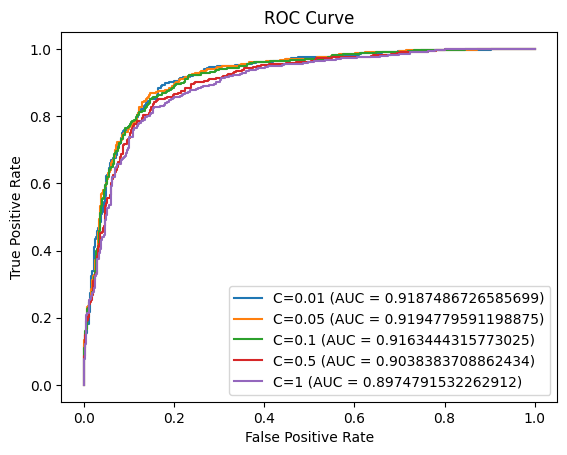

In [16]:
for c in [0.01, 0.05, 0.1, 0.5, 1]:  # with Logistic Regression
    lr = LogisticRegression(C=c, max_iter=1000) #initializing LogisticRegression inctance
    lr.fit(X_train, y_train) # training

    y_pred_lr = lr.predict(X_test) # predicting


    acc = accuracy_score(y_test, y_pred_lr)
    print("Logistic Regression Accuracy for C=", c, acc)


    fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1]) # calculating ROC curve and area under curve
    roc_auc = auc(fpr, tpr)


    print("Area Under the Curve (AUC) for C=",c,roc_auc)


    plt.plot(fpr, tpr, label=f'C={c} (AUC = {roc_auc})') # the roc curve


plt.xlabel('False Positive Rate') # plotting
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()